# Göktuğ Açık HW1
## 1) Number of animals treated by İBB veterinary services 

In [1]:
#Install and include necessary packages
#install.packages("openxlsx")
#install.packages("gridExtra")
#install.packages("dplyr");
#install.packages("ggplot2")
   


In [2]:
#Include necessary packages
library("openxlsx")
library("gridExtra")
library("dplyr");
library("ggplot2") 

Warning message:
"package 'openxlsx' was built under R version 3.6.3"Warning message:
"package 'gridExtra' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following object is masked from 'package:gridExtra':

    combine

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [3]:
#Print your current directory so you can be sure that your data files is in the same directory with your directry
print(getwd())

[1] "C:/Users/Raven/Desktop/Göktug/Ders/IE 360"


In [4]:
#Read and check data obtained from IBB source 
#https://gida.ibb.istanbul/veteriner-hizmetleri-mudurlugu/ibb-veteriner-rehabilitasyon-istatistikleri/170/muayene-ve-tedavi-edilen-hayvan-sayisi.html

df <- read.xlsx("veteriner - ibb.xlsx", sheet = 1,
  startRow = 1,
  colNames = TRUE,
  rowNames = FALSE,
  detectDates = FALSE,
  skipEmptyRows = TRUE,
  skipEmptyCols = TRUE,
  rows = NULL,
  cols = NULL,
  check.names = FALSE,
  sep.names = ".",
  namedRegion = NULL,
  na.strings = "NA",
  fillMergedCells = FALSE
)
df <- df[0:2]
class(df)
head(df)

#Read and check data obtained from Google Trends source 
df2 <- read.xlsx("veteriner -google.xlsx", sheet = 2,
  startRow = 1,
  colNames = TRUE,
  rowNames = FALSE,
  detectDates = FALSE,
  skipEmptyRows = TRUE,
  skipEmptyCols = TRUE,
  rows = NULL,
  cols = NULL,
  check.names = FALSE,
  sep.names = ".",
  namedRegion = NULL,
  na.strings = "NA",
  fillMergedCells = FALSE
)
class(df2)
head(df2)


[1] "data.frame"

Year,belediye.veteriner:.(istanbul)
2008,15635
2009,18463
2010,15898
2011,16140
2012,24930
2013,59908


[1] "data.frame"

Year,belediye.veteriner.istanbul
2008,26
2009,75
2010,56
2011,49
2012,31
2013,47


In [5]:
years<-df[[1]]
no_of_animals<-df[[2]]
years
no_of_animals
years2 <- df2[[1]]
years2
search_volume <- df2[[2]]
search_volume

[1] 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019

[1]  15635  18463  15898  16140  24930  59908  38288  58285 118900 125831
[11] 146746 174341

[1] 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019

[1]  26  75  56  49  31  47  60  50  75 126 162 207

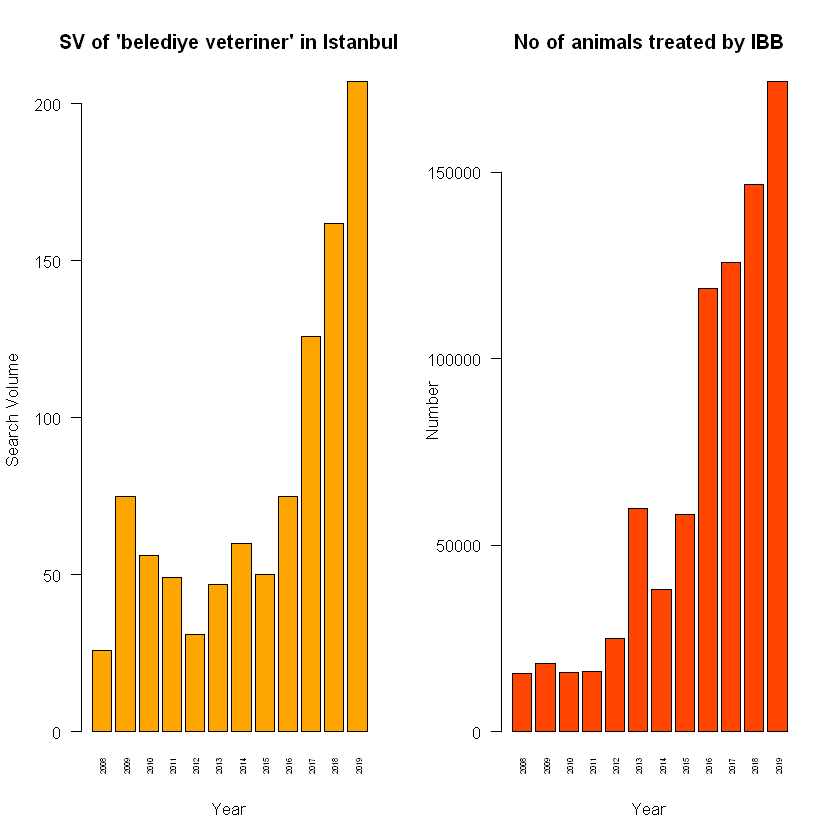

In [6]:
#Plot data side by side to compare visually as barplot
layout(matrix(c(1,2), 2, 2, byrow = TRUE))
barplot(search_volume,
main = "SV of 'belediye veteriner' in İstanbul",
names.arg = years2,
las=2, cex.names=.5,
xlab = "Year",
ylab = "Search Volume",
col = "orange")
barplot(no_of_animals,
main = "No of animals treated by İBB",
names.arg =years,
las=2, cex.names=.5,
xlab = "Year",
ylab = "Number",
col = "orangered")


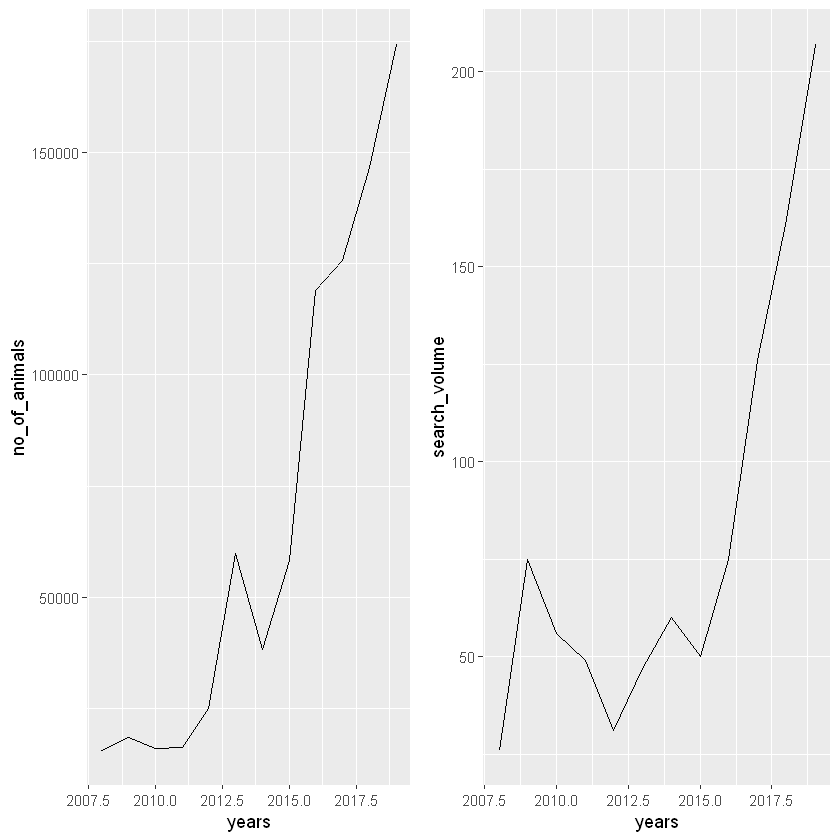

In [7]:
#Plot data side by side to compare visually as geom_line
p1 <- ggplot(data=df, aes(x=years, y=no_of_animals)) + geom_line()
p2 <- ggplot(data=df2, aes(x=years, y=search_volume)) + geom_line()
grid.arrange(p1, p2, nrow = 1)

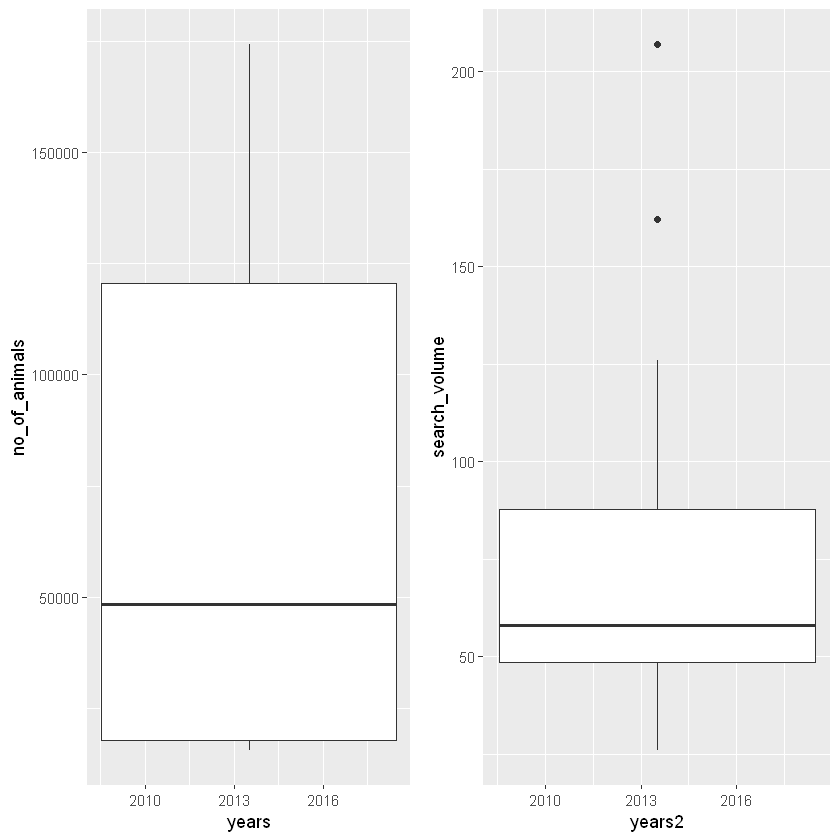

In [8]:
#Plot data side by side to compare visually as boxplot but since we only have total numbers for a year it is not very meaningful

p3 <- ggplot(df, aes(x=years, y=no_of_animals, group=1)) + 
  geom_boxplot()
p4 <- ggplot(df2, aes(x=years2, y=search_volume, group=1)) + 
  geom_boxplot()
grid.arrange(p3, p4, nrow = 1)

## 1) Conclusion
We can see that patterns of the two data are similar and increasing .

## 2) Earthquake

In [9]:
dfe <- read.csv("earthquake.csv", header = TRUE, sep = ",")
dfg <- read.csv("earthquake -google.csv", header = TRUE, sep=",", quote="\"", stringsAsFactors=FALSE)
dfe$date=as.Date(as.character(dfe$date),"%Y.%m.%d")


In [10]:
#Create new empty data frame to collect the worst earthquake of each month
maxofmonth <- data.frame(matrix(ncol = 2, nrow = 0) )
cn <- c("month", "richter")
colnames(maxofmonth) <- cn

x <- c(2007:2017)
y <- c(1:11)

#Iterate and find max of every month
for (k in x) {
    for (l in y) {
        #Last data is in 2017-07       
        if(k==2017 & l==8){
            break
        }
            
        if (l==12) {
         DATE1 <- as.Date( paste(k, l, "01", sep = "-") )
         DATE2 <- as.Date( paste(k, l, "31", sep = "-") )
        } else {
            DATE1 <- as.Date( paste(k, l, "01", sep = "-") )
            DATE2 <- as.Date( paste(k, l+1, "01", sep = "-") )
            }
  
        test <- dfe[dfe$date >= DATE1 & dfe$date < DATE2,]
        test<- test[order(test$richter ), ] 
        cur_month <-   paste(k, l, sep = "-") 
        max_r <- (tail(test$richter, n = 1))
        #print(cur_month)
        #print(max_r)
        maxofmonth[nrow(maxofmonth)+1,] <- list(cur_month,max_r)


        
    }
}


In [11]:
months<-maxofmonth[[1]]
max_of_month<-maxofmonth[[2]]
months
max_of_month
months2 <- dfg[[1]]
months2
search_volume2 <- dfg[[2]]
search_volume2


[1] "2007-1"  "2007-2"  "2007-3"  "2007-4"  "2007-5"  "2007-6"  "2007-7" 
  [8] "2007-8"  "2007-9"  "2007-10" "2007-11" "2008-1"  "2008-2"  "2008-3" 
 [15] "2008-4"  "2008-5"  "2008-6"  "2008-7"  "2008-8"  "2008-9"  "2008-10"
 [22] "2008-11" "2009-1"  "2009-2"  "2009-3"  "2009-4"  "2009-5"  "2009-6" 
 [29] "2009-7"  "2009-8"  "2009-9"  "2009-10" "2009-11" "2010-1"  "2010-2" 
 [36] "2010-3"  "2010-4"  "2010-5"  "2010-6"  "2010-7"  "2010-8"  "2010-9" 
 [43] "2010-10" "2010-11" "2011-1"  "2011-2"  "2011-3"  "2011-4"  "2011-5" 
 [50] "2011-6"  "2011-7"  "2011-8"  "2011-9"  "2011-10" "2011-11" "2012-1" 
 [57] "2012-2"  "2012-3"  "2012-4"  "2012-5"  "2012-6"  "2012-7"  "2012-8" 
 [64] "2012-9"  "2012-10" "2012-11" "2013-1"  "2013-2"  "2013-3"  "2013-4" 
 [71] "2013-5"  "2013-6"  "2013-7"  "2013-8"  "2013-9"  "2013-10" "2013-11"
 [78] "2014-1"  "2014-2"  "2014-3"  "2014-4"  "2014-5"  "2014-6"  "2014-7" 
 [85] "2014-8"  "2014-9"  "2014-10" "2014-11" "2015-1"  "2015-2"  "2015-3" 
 [92] "2015-4"  "2015-5"  "2015-6"  "2015-7"  "2015-8"  "2015-9"  "2015-10"
 [99] "2015-11" "2016-1"  "2016-2"  "2016-3"  "2016-4"  "2016-5"  "2016-6" 
[106] "2016-7"  "2016-8"  "2016-9"  "2016-10" "2016-11" "2017-1"  "2017-2" 
[113] "2017-3"  "2017-4"  "2017-5"  "2017-6"  "2017-7"

[1] 5.0 5.9 4.8 5.0 4.8 4.3 4.8 5.4 5.1 5.1 5.3 4.9 5.3 5.0 4.8 4.3 5.3 6.4
 [19] 4.5 5.1 5.8 4.9 5.1 5.0 4.3 4.2 4.7 5.7 5.3 5.1 5.9 4.1 4.5 4.8 4.7 6.0
 [37] 4.5 4.3 4.2 4.8 4.9 4.8 5.1 5.4 5.3 5.2 4.6 6.2 5.9 5.4 5.2 4.5 5.6 6.7
 [55] 5.6 5.3 5.3 5.2 4.9 6.5 6.0 6.0 5.4 5.5 5.3 5.8 6.2 4.8 5.2 5.1 5.3 6.0
 [73] 5.3 5.1 5.2 6.4 6.0 4.6 4.5 4.7 5.4 6.5 5.2 4.5 5.6 5.2 4.9 5.6 5.0 4.6
 [91] 5.1 6.1 4.7 5.3 5.2 4.8 5.8 5.4 5.1 5.2 4.6 5.2 4.8 5.4 4.7 5.1 4.2 5.8
[109] 5.4 5.1 5.3 5.4 5.7 5.1 5.3 6.3 6.6

[1] "2007-01" "2007-02" "2007-03" "2007-04" "2007-05" "2007-06" "2007-07"
  [8] "2007-08" "2007-09" "2007-10" "2007-11" "2007-12" "2008-01" "2008-02"
 [15] "2008-03" "2008-04" "2008-05" "2008-06" "2008-07" "2008-08" "2008-09"
 [22] "2008-10" "2008-11" "2008-12" "2009-01" "2009-02" "2009-03" "2009-04"
 [29] "2009-05" "2009-06" "2009-07" "2009-08" "2009-09" "2009-10" "2009-11"
 [36] "2009-12" "2010-01" "2010-02" "2010-03" "2010-04" "2010-05" "2010-06"
 [43] "2010-07" "2010-08" "2010-09" "2010-10" "2010-11" "2010-12" "2011-01"
 [50] "2011-02" "2011-03" "2011-04" "2011-05" "2011-06" "2011-07" "2011-08"
 [57] "2011-09" "2011-10" "2011-11" "2011-12" "2012-01" "2012-02" "2012-03"
 [64] "2012-04" "2012-05" "2012-06" "2012-07" "2012-08" "2012-09" "2012-10"
 [71] "2012-11" "2012-12" "2013-01" "2013-02" "2013-03" "2013-04" "2013-05"
 [78] "2013-06" "2013-07" "2013-08" "2013-09" "2013-10" "2013-11" "2013-12"
 [85] "2014-01" "2014-02" "2014-03" "2014-04" "2014-05" "2014-06" "2014-07"
 [92] "2014-08" "2014-09" "2014-10" "2014-11" "2014-12" "2015-01" "2015-02"
 [99] "2015-03" "2015-04" "2015-05" "2015-06" "2015-07" "2015-08" "2015-09"
[106] "2015-10" "2015-11" "2015-12" "2016-01" "2016-02" "2016-03" "2016-04"
[113] "2016-05" "2016-06" "2016-07" "2016-08" "2016-09" "2016-10" "2016-11"
[120] "2016-12" "2017-01" "2017-02" "2017-03" "2017-04" "2017-05" "2017-06"
[127] "2017-07"

[1]  30  39  42  35  20  16  10  18  14  16  22  38  24  17  34  21  23  13
 [19]  18  10  15  12  18  16  20  19  25  22  13  12  10  10  25  11  10  13
 [37]  12  16  37  18  14   8   6  10   6  21  21  11  13  12  40  16  52  16
 [55]  23  10   8  66  40  31  16  16  20  21  24  39  16  15  13  19  13  13
 [73]  27   9  16  13  12   7  10  10   9  10  19  21   9  12  12  11  54  12
 [91]  16  19  13  16  15  22  16  12  17  14  13  10  28  17  14  20  23  18
[109]  23  10  12  14  12  33  17  15  24  28  14  15  13  49  34  33  31 100
[127]  78

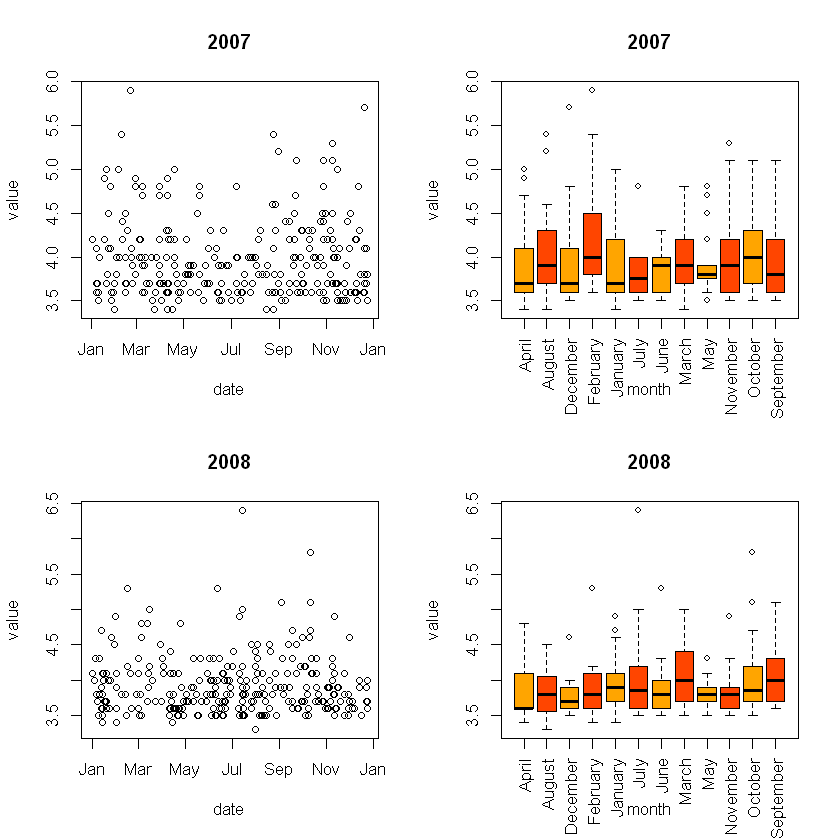

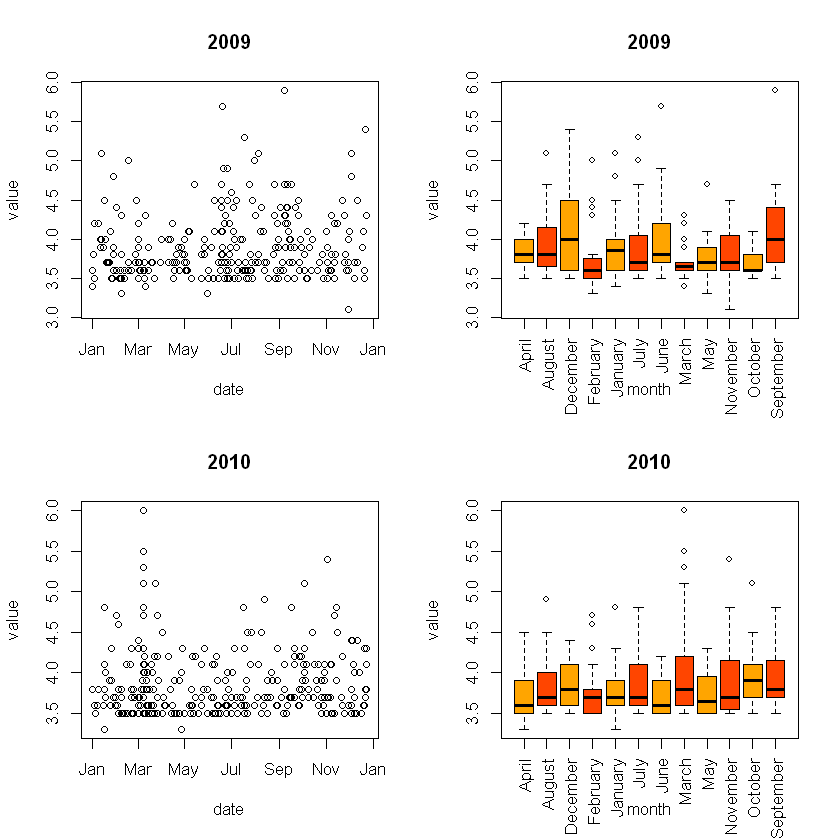

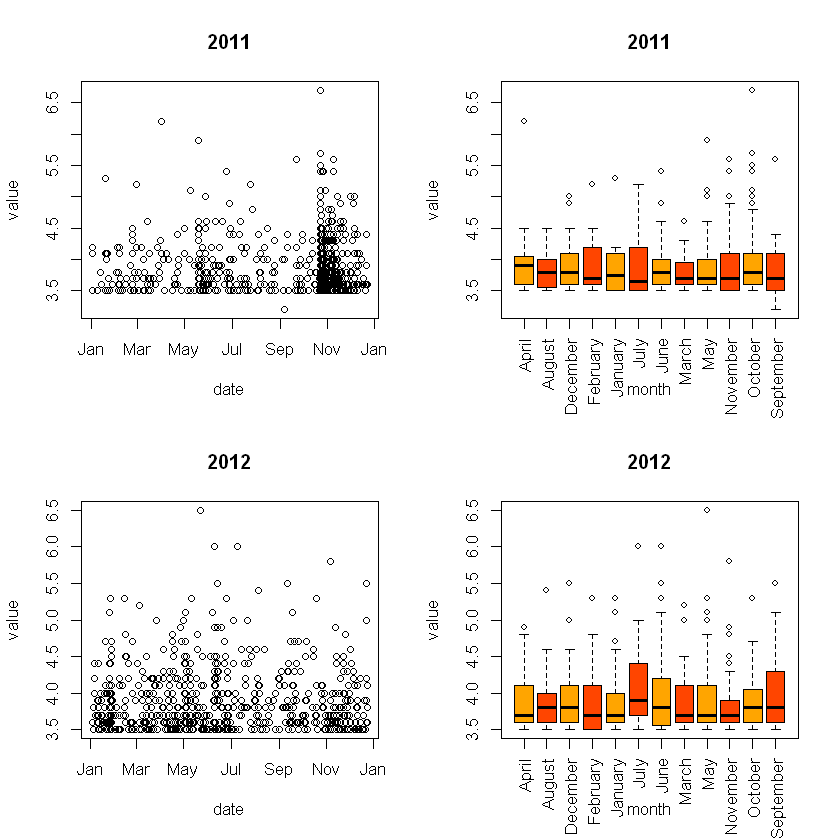

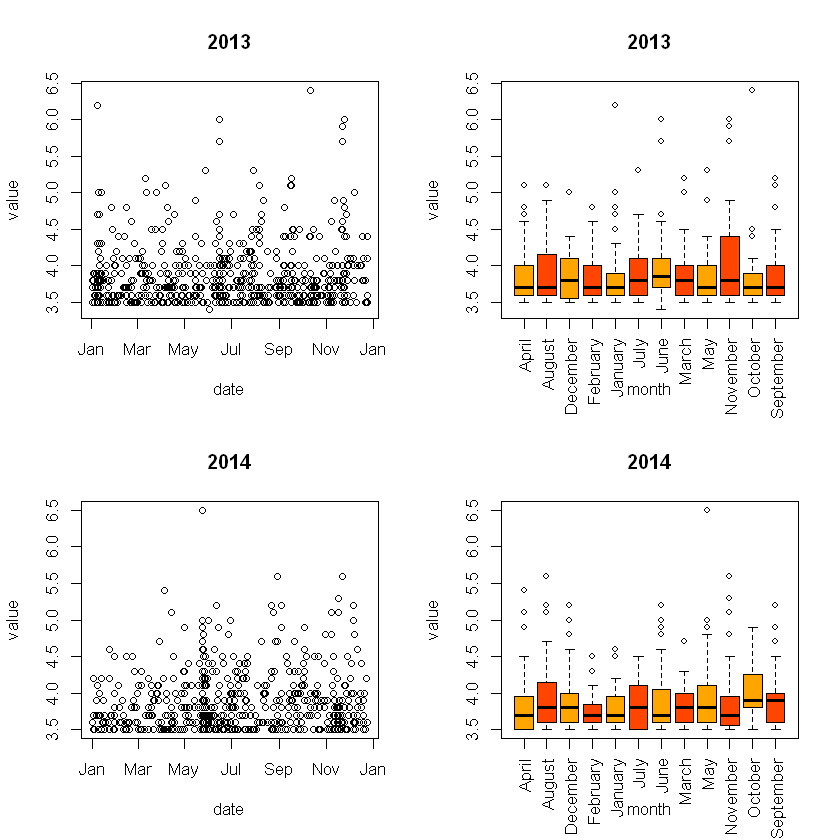

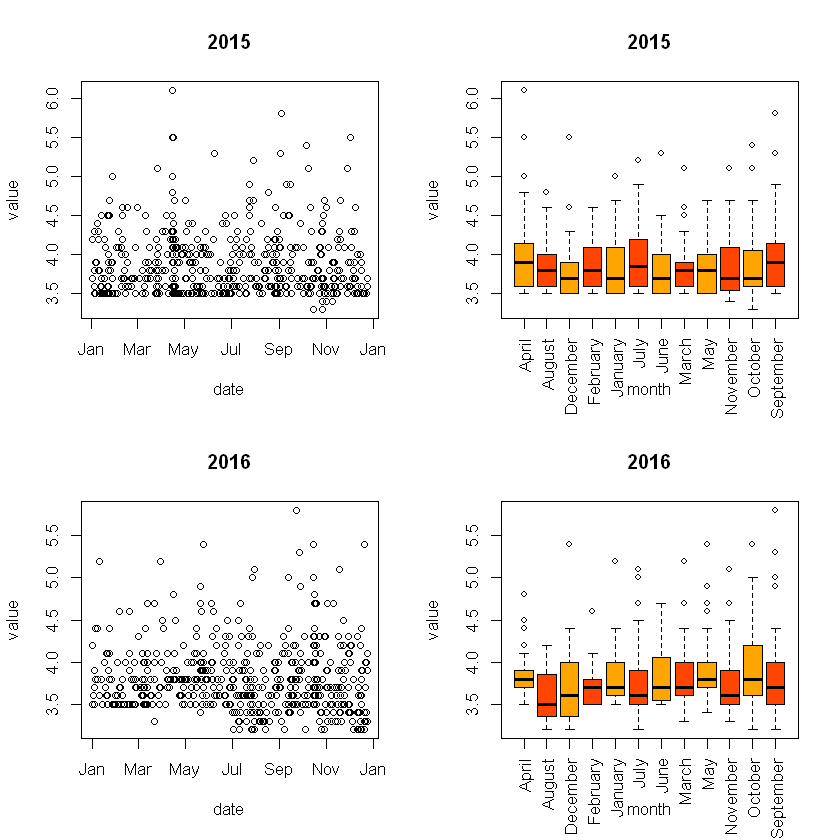

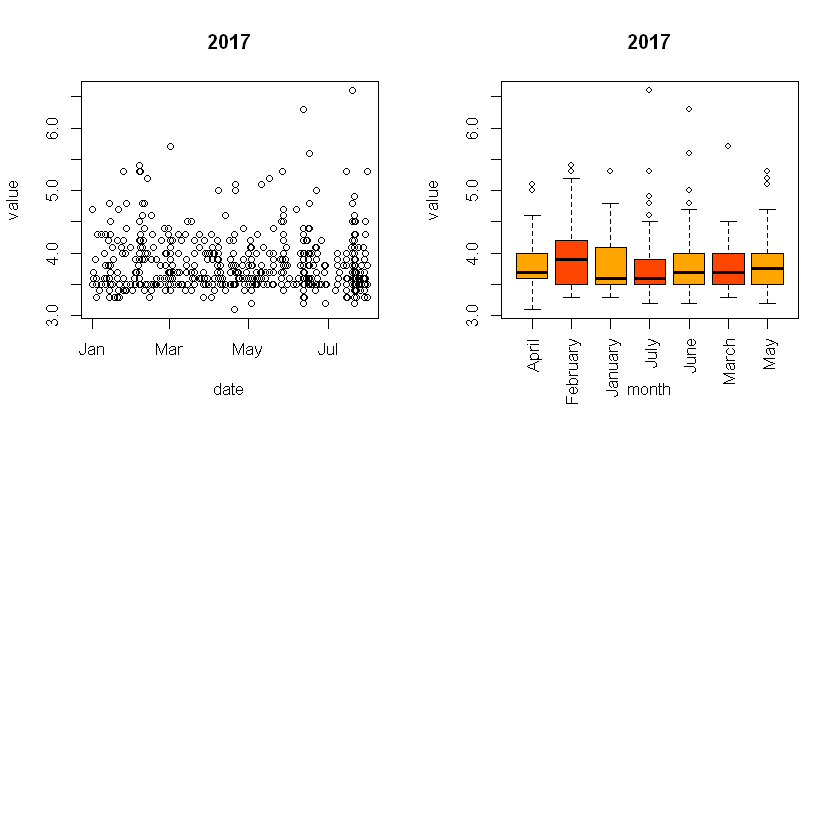

In [12]:
layout(matrix(c(1,2,3,4), 2, 2, byrow = TRUE))

x <- c(2007:2017)
y <- c(1:11)

#Iterate and find max of every month
for (k in x) {

         DATE1 <- as.Date( paste(k, "1", "01", sep = "-") )
         DATE2 <- as.Date( paste(k, "12", "25", sep = "-") )

  
        test <- dfe[dfe$date >= DATE1 & dfe$date < DATE2,]
    d <- test$date
    x <- test$richter
    x[x==0] <- NA
    dx <- data.frame(date=d, value=x)
    plot(dx,main=k)
    dx$month <- format(dx$date, format="%B")
    boxplot(value ~ month, data=dx, las=3, col=(c("orange","orangered")), main=k)
}




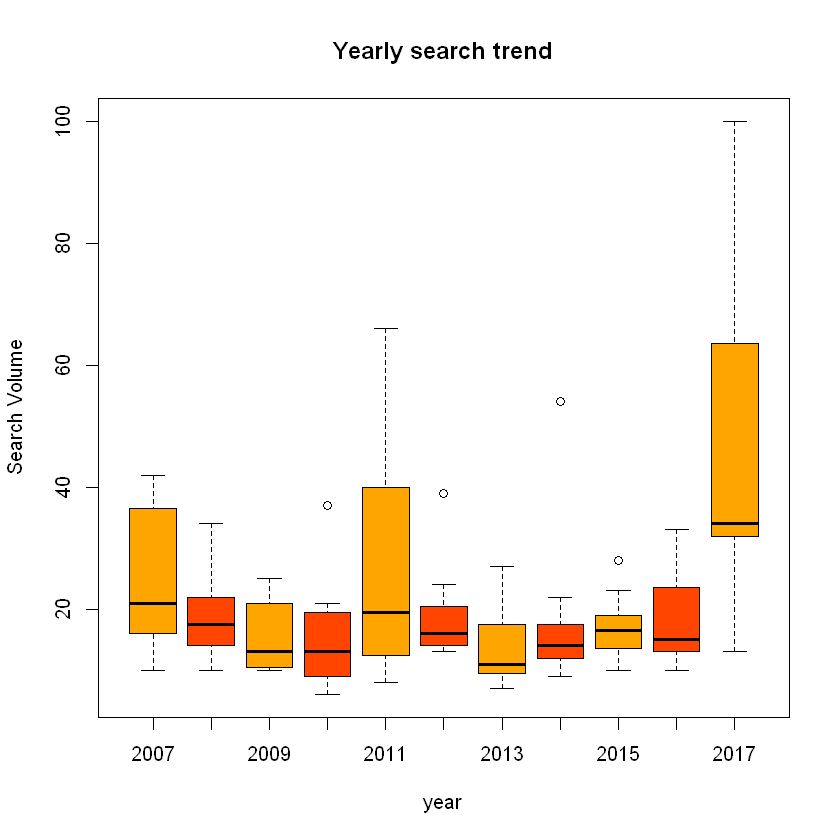

In [13]:
dfg$year <- sapply(strsplit(as.character(dfg$Month), "-"), `[`, 1)

boxplot(dfg[[2]]~year, data=dfg, 
        col=(c("orange","orangered")),
        main="Yearly search trend",
       ylab="Search Volume")

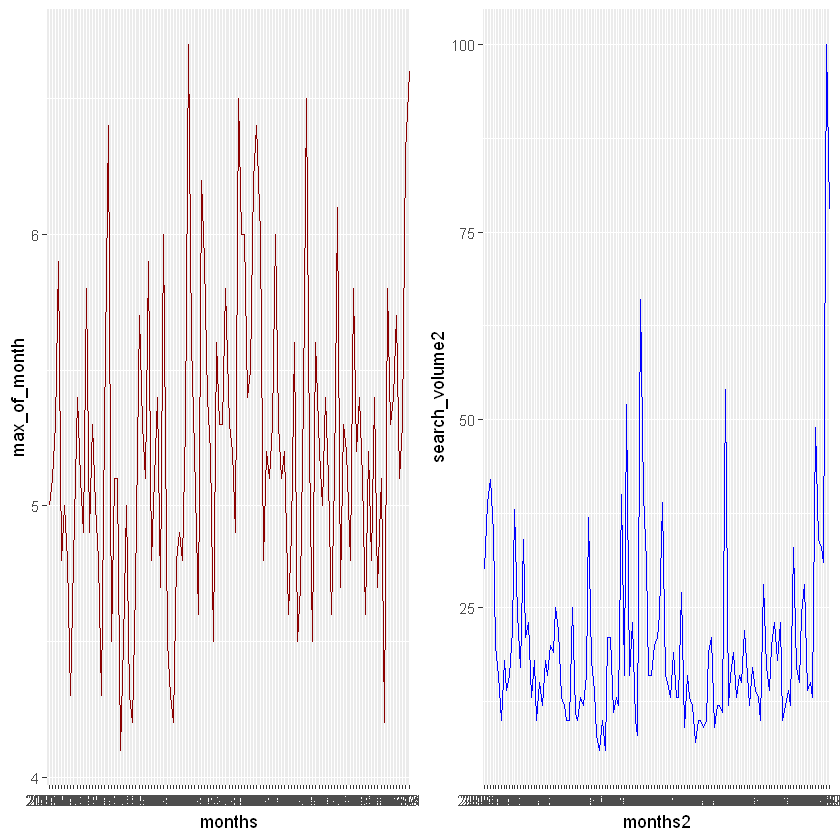

In [14]:
plot1 <- ggplot() + geom_line(aes(x=months,y=max_of_month, group=1),color='darkred') 
plot2 <-  ggplot() +  geom_line( aes(x=months2,y=search_volume2, group=1),color='blue')  
grid.arrange(plot1, plot2, nrow = 1)

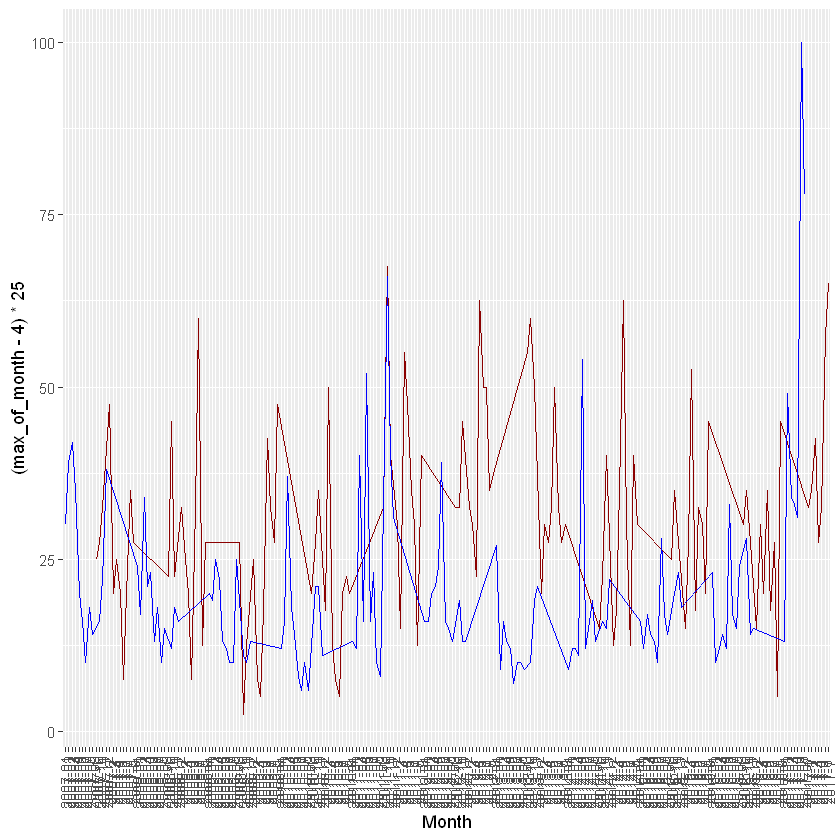

In [15]:

plot1 <- ggplot() + geom_line(aes(x=months,y=(max_of_month-4)*25, group=1),color='darkred') +  
geom_line( aes(x=months2,y=search_volume2, group=1),color='blue') +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) +
  scale_x_discrete()+
  xlab("Month")
plot1

## 2) Conclusion
On earthquake data boxplots we see that there is no pattern. Also, I have removed 0 richter data to be more consistent.
On search data we see a surge in years of 2011(van earthquake) and 2017(muğla earthquake). 
On line plots, even though 'deprem' keyword search volume spikes and richter spikes matches on big magnitude earthquakes such as 2011 Van or 2017 Muğla some high magnitude earthquakes which hasn't effected humans does not match. Maybe a model including other parameters such as distance, and depth would be more accurate

## 3)Sinema Seyirci Sayısı

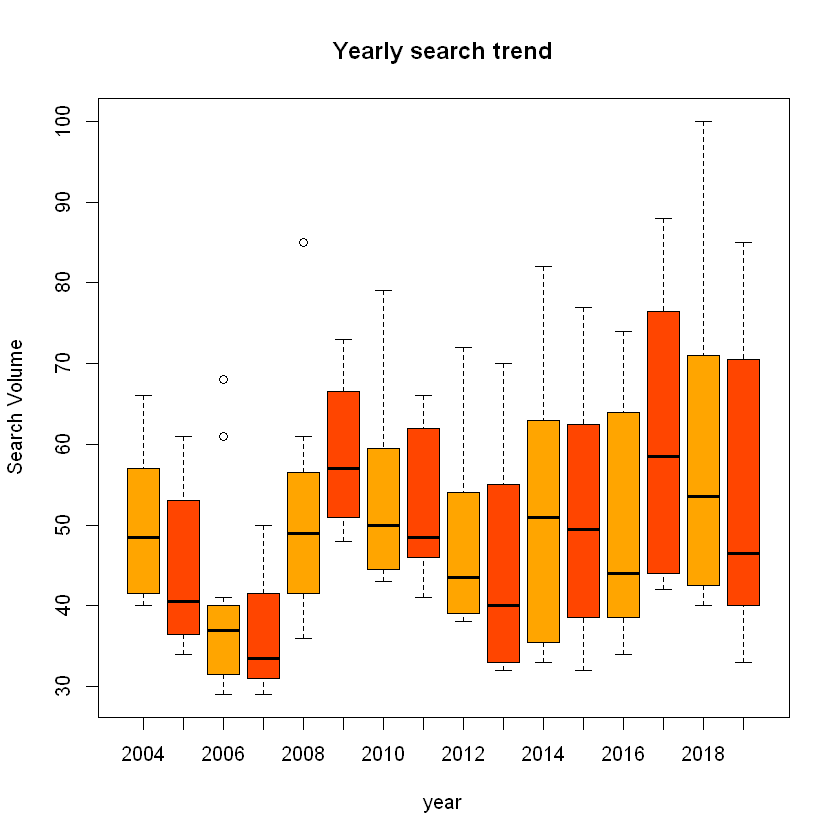

In [16]:
seyirci <- read.xlsx("tuik-sinema.xlsx", sheet = 1,
  startRow = 1,
  colNames = TRUE,
  rowNames = FALSE,
  detectDates = FALSE,
  skipEmptyRows = TRUE,
  skipEmptyCols = TRUE,
  rows = NULL,
  cols = NULL,
  check.names = FALSE,
  sep.names = ".",
  namedRegion = NULL,
  na.strings = "NA",
  fillMergedCells = FALSE
)
seyirci_google <- read.csv("sinema-google.csv", header = TRUE, sep=",", quote="\"", stringsAsFactors=FALSE)
seyirci_google$year <- sapply(strsplit(as.character(seyirci_google$Month), "-"), `[`, 1)

boxplot(seyirci_google[[2]]~year, data=seyirci_google, 
        col=(c("orange","orangered")),
        main="Yearly search trend",
       ylab="Search Volume")

In [17]:
seyirci_google_total <- aggregate(x = seyirci_google$sinema,                
          by = list(seyirci_google$year),              
          FUN = mean)                            


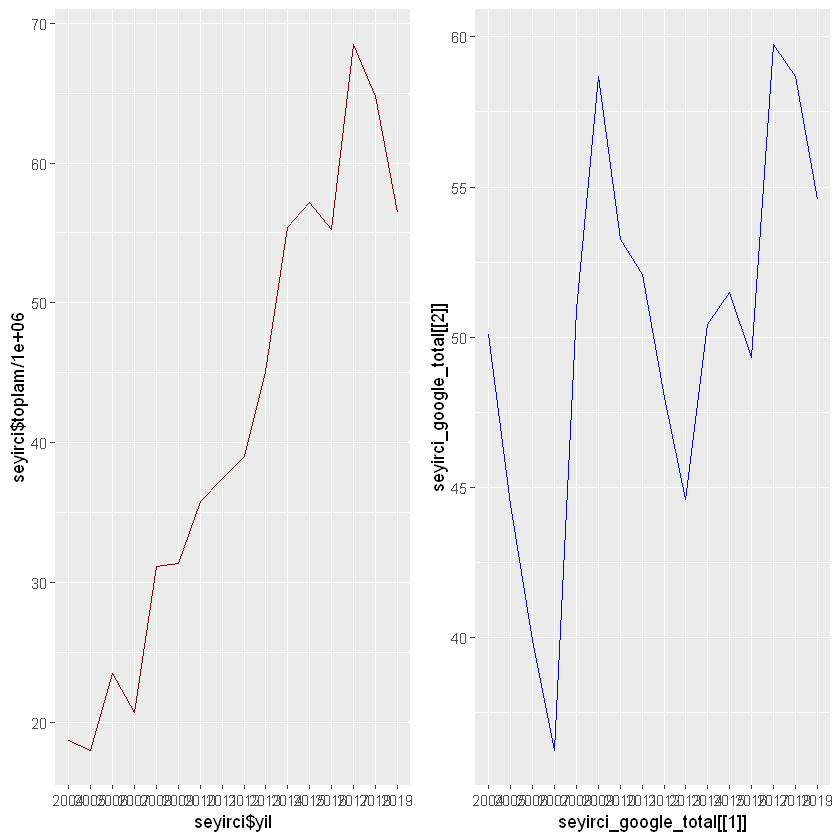

In [18]:

plot_sinema <- ggplot() + geom_line(aes(x=seyirci$yil,y=seyirci$toplam/1000000, group=1),color='darkred')   
plot_google <- ggplot() + geom_line( aes(x=seyirci_google_total[[1]],y=seyirci_google_total[[2]], group=1),color='blue') 
grid.arrange(plot_sinema, plot_google, nrow = 1)



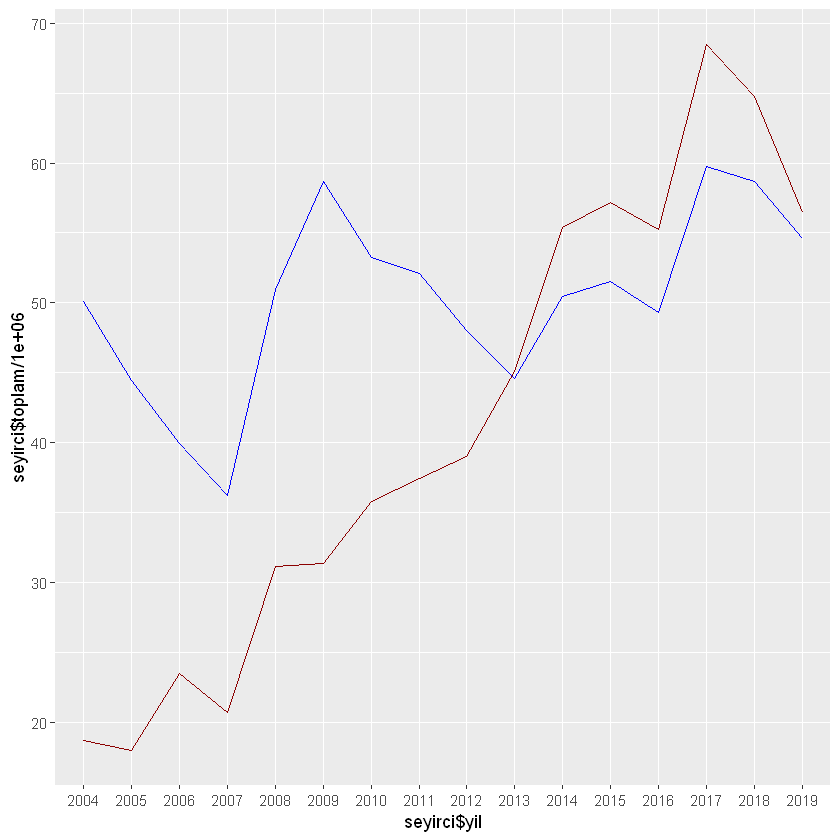

In [19]:

plot_both <- ggplot() + geom_line(aes(x=seyirci$yil,y=seyirci$toplam/1000000, group=1),color='darkred') +
 geom_line( aes(x=seyirci_google_total[[1]],y=seyirci_google_total[[2]], group=1),color='blue')
plot_both

## 3) Conclusion
While total number of audience increasing almost constantly 'sinema' keyword search volume flactuates and increase at a lower rate.